In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
%matplotlib inline

import scipy.optimize as opt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# I. Read File and Display Contents

In [2]:
df=pd.read_csv('framingham.csv')
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.tail()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [4]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
df.shape

(4240, 16)

In [6]:
df['Gender'].value_counts()

0    2420
1    1820
Name: Gender, dtype: int64

In [7]:
df['education'].value_counts()

1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

In [8]:
df['currentSmoker'].value_counts()

0    2145
1    2095
Name: currentSmoker, dtype: int64

In [9]:
df['BPMeds'].value_counts()

0.0    4063
1.0     124
Name: BPMeds, dtype: int64

In [10]:
df['prevalentStroke'].value_counts()

0    4215
1      25
Name: prevalentStroke, dtype: int64

In [11]:
df['prevalentHyp'].value_counts()

0    2923
1    1317
Name: prevalentHyp, dtype: int64

In [12]:
df['diabetes'].value_counts()

0    4131
1     109
Name: diabetes, dtype: int64

In [13]:
df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
Gender             4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# II. Handling Missing Data, Outliers and Duplicate Data

In [15]:
df.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
print((df["glucose"].mode())[0])

75.0


In [18]:
df["glucose"].fillna((df["glucose"].mode())[0], inplace=True)
#Filling the missing spaces of glucosecolumn with the mode of the data

In [19]:
total = df.isnull().sum().sort_values(ascending= False)
percentage_total= (df.isnull().sum()/df.isnull().count().sort_values(ascending=False))*100
missing= pd.concat([total,percentage_total], axis =1, keys = ['Total', 'Percentage'])
missingData = missing[missing['Total']>0]
missingData

C:\Users\vedan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Total,Percentage
BMI,19,0.448113
BPMeds,53,1.250000
cigsPerDay,29,0.683962
education,105,2.476415
heartRate,1,0.023585
totChol,50,1.179245


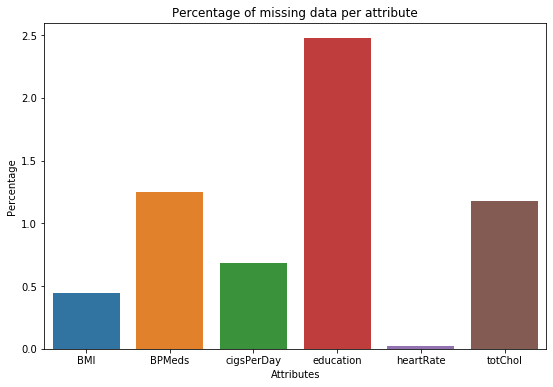

In [20]:
plt.figure(figsize=(9,6))
sns.barplot(x=missingData.index, y = missingData['Percentage'], data = missingData)
plt.title('Percentage of missing data per attribute')
plt.xlabel('Attributes')
plt.ylabel('Percentage')
plt.show()

Glucose has the highest number of missing values, at 9.15%

In [21]:
print(df.isnull().sum().sum())
df=df.dropna()
print(df.isnull().sum().sum())
df.shape

257
0


(3989, 16)

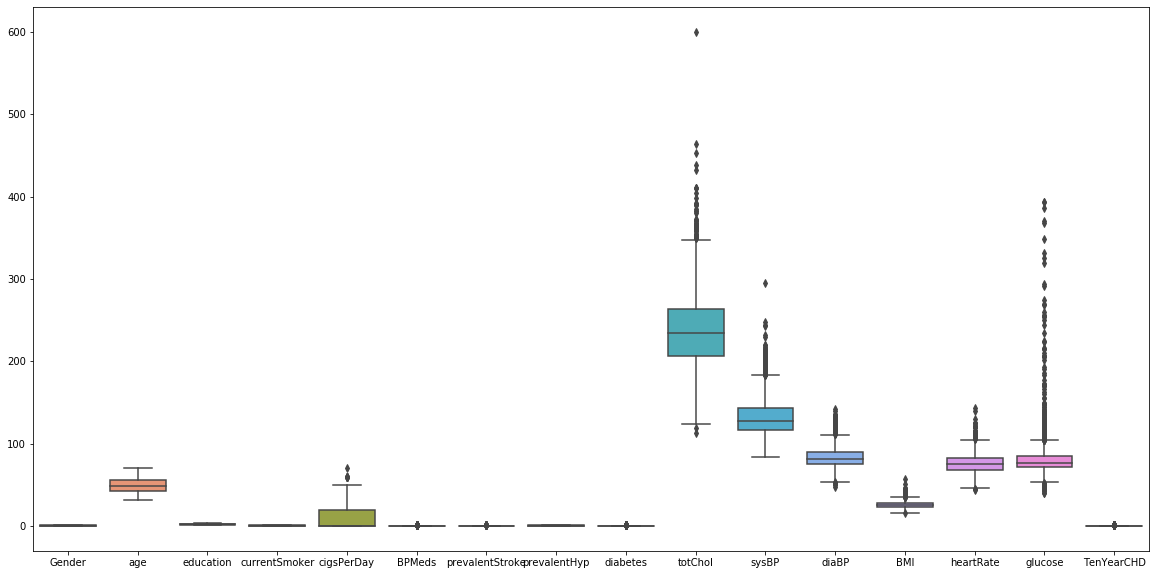

In [22]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df)
plt.show()
#Removable Outliers are detected in totChol and sysBP columns of our dataset.

In [23]:
df['totChol'].max()
#outlier in totChol

600.0

In [24]:
df = df[df['totChol']<600.0]
df.shape

(3988, 16)

In [25]:
df['sysBP'].max()

295.0

In [26]:
df=df[df['sysBP']<295]
df.shape

(3987, 16)

# III. Exploratory Data Analysis and Basic Statistics

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,3987.0,0.433409,0.495608,0.00,0.00,0.00,1.00,1.0
age,3987.0,49.469526,8.531325,32.00,42.00,49.00,56.00,70.0
education,3987.0,1.982694,1.020832,1.00,1.00,2.00,3.00,4.0
currentSmoker,3987.0,0.491347,0.499988,0.00,0.00,0.00,1.00,1.0
cigsPerDay,3987.0,9.027840,11.918332,0.00,0.00,0.00,20.00,70.0
BPMeds,3987.0,0.029345,0.168794,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3987.0,0.005518,0.074087,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3987.0,0.309255,0.462244,0.00,0.00,0.00,1.00,1.0
diabetes,3987.0,0.025082,0.156392,0.00,0.00,0.00,0.00,1.0
totChol,3987.0,236.502132,43.653337,113.00,206.00,234.00,263.00,464.0


Observation from above cell: It shows the mean, standard deviation and other statistical metrices of the dataset. It shows the categorical data of the dataset since they were already converted into discrete numerical values

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Gender,1.000000,-0.022271,0.012846,0.200413,0.325378,-0.050109,-0.003655,0.008331,0.018317,-0.067404,-0.031767,0.060054,0.080171,-0.115686,0.009070,0.092442
age,-0.022271,1.000000,-0.160758,-0.213310,-0.190319,0.128583,0.045118,0.304031,0.104931,0.271461,0.389472,0.204822,0.133489,-0.008925,0.116007,0.228941
education,0.012846,-0.160758,1.000000,0.018139,0.006329,-0.010156,-0.028592,-0.081164,-0.034995,-0.023309,-0.127374,-0.062408,-0.135678,-0.057808,-0.031328,-0.053684
currentSmoker,0.200413,-0.213310,0.018139,1.000000,0.770796,-0.049012,-0.032574,-0.105110,-0.038933,-0.047181,-0.129719,-0.108840,-0.164294,0.052682,-0.051469,0.023450
cigsPerDay,0.325378,-0.190319,0.006329,0.770796,1.000000,-0.044054,-0.033985,-0.066410,-0.035235,-0.024983,-0.086929,-0.050388,-0.087239,0.068342,-0.050903,0.060126
BPMeds,-0.050109,0.128583,-0.010156,-0.049012,-0.044054,1.000000,0.127479,0.259859,0.048140,0.087307,0.262652,0.196724,0.103322,0.016391,0.054397,0.090205
prevalentStroke,-0.003655,0.045118,-0.028592,-0.032574,-0.033985,0.127479,1.000000,0.067370,0.009705,0.008219,0.055719,0.049504,0.031511,-0.012082,0.016523,0.044988
prevalentHyp,0.008331,0.304031,-0.081164,-0.105110,-0.066410,0.259859,0.067370,1.000000,0.073136,0.163205,0.695979,0.615394,0.303619,0.150751,0.083679,0.174795
diabetes,0.018317,0.104931,-0.034995,-0.038933,-0.035235,0.048140,0.009705,0.073136,1.000000,0.032146,0.100603,0.050340,0.082461,0.051506,0.608596,0.086217
totChol,-0.067404,0.271461,-0.023309,-0.047181,-0.024983,0.087307,0.008219,0.163205,0.032146,1.000000,0.214626,0.171085,0.122846,0.088668,0.044419,0.078166


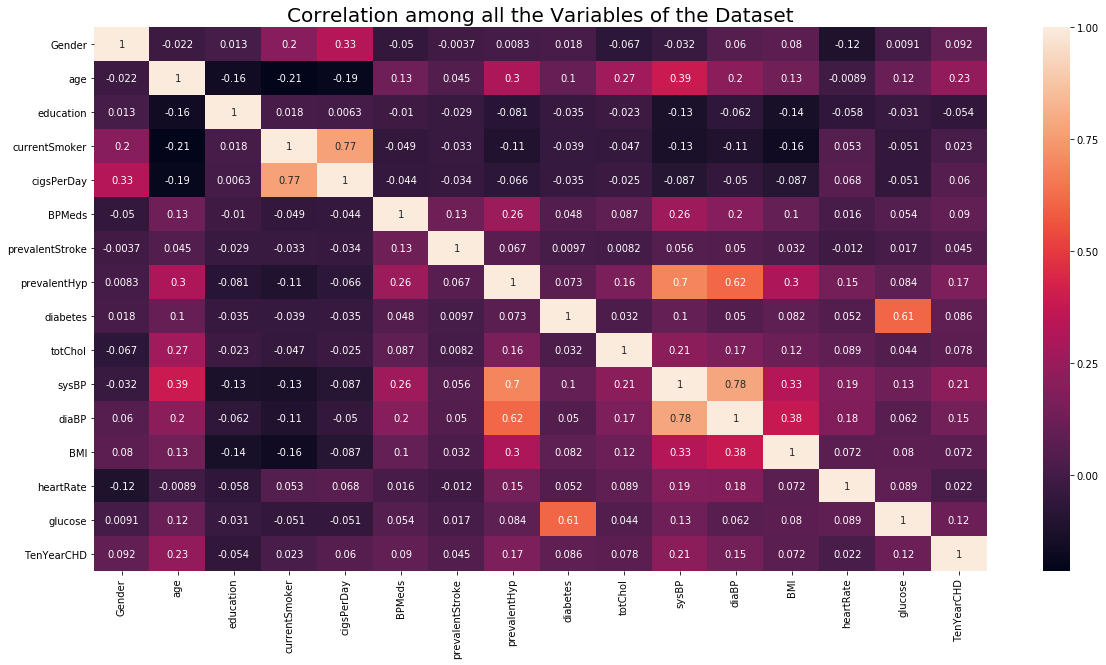

In [28]:
#checking correlation
cor=df.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

In [29]:
categorical_features = ['Gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

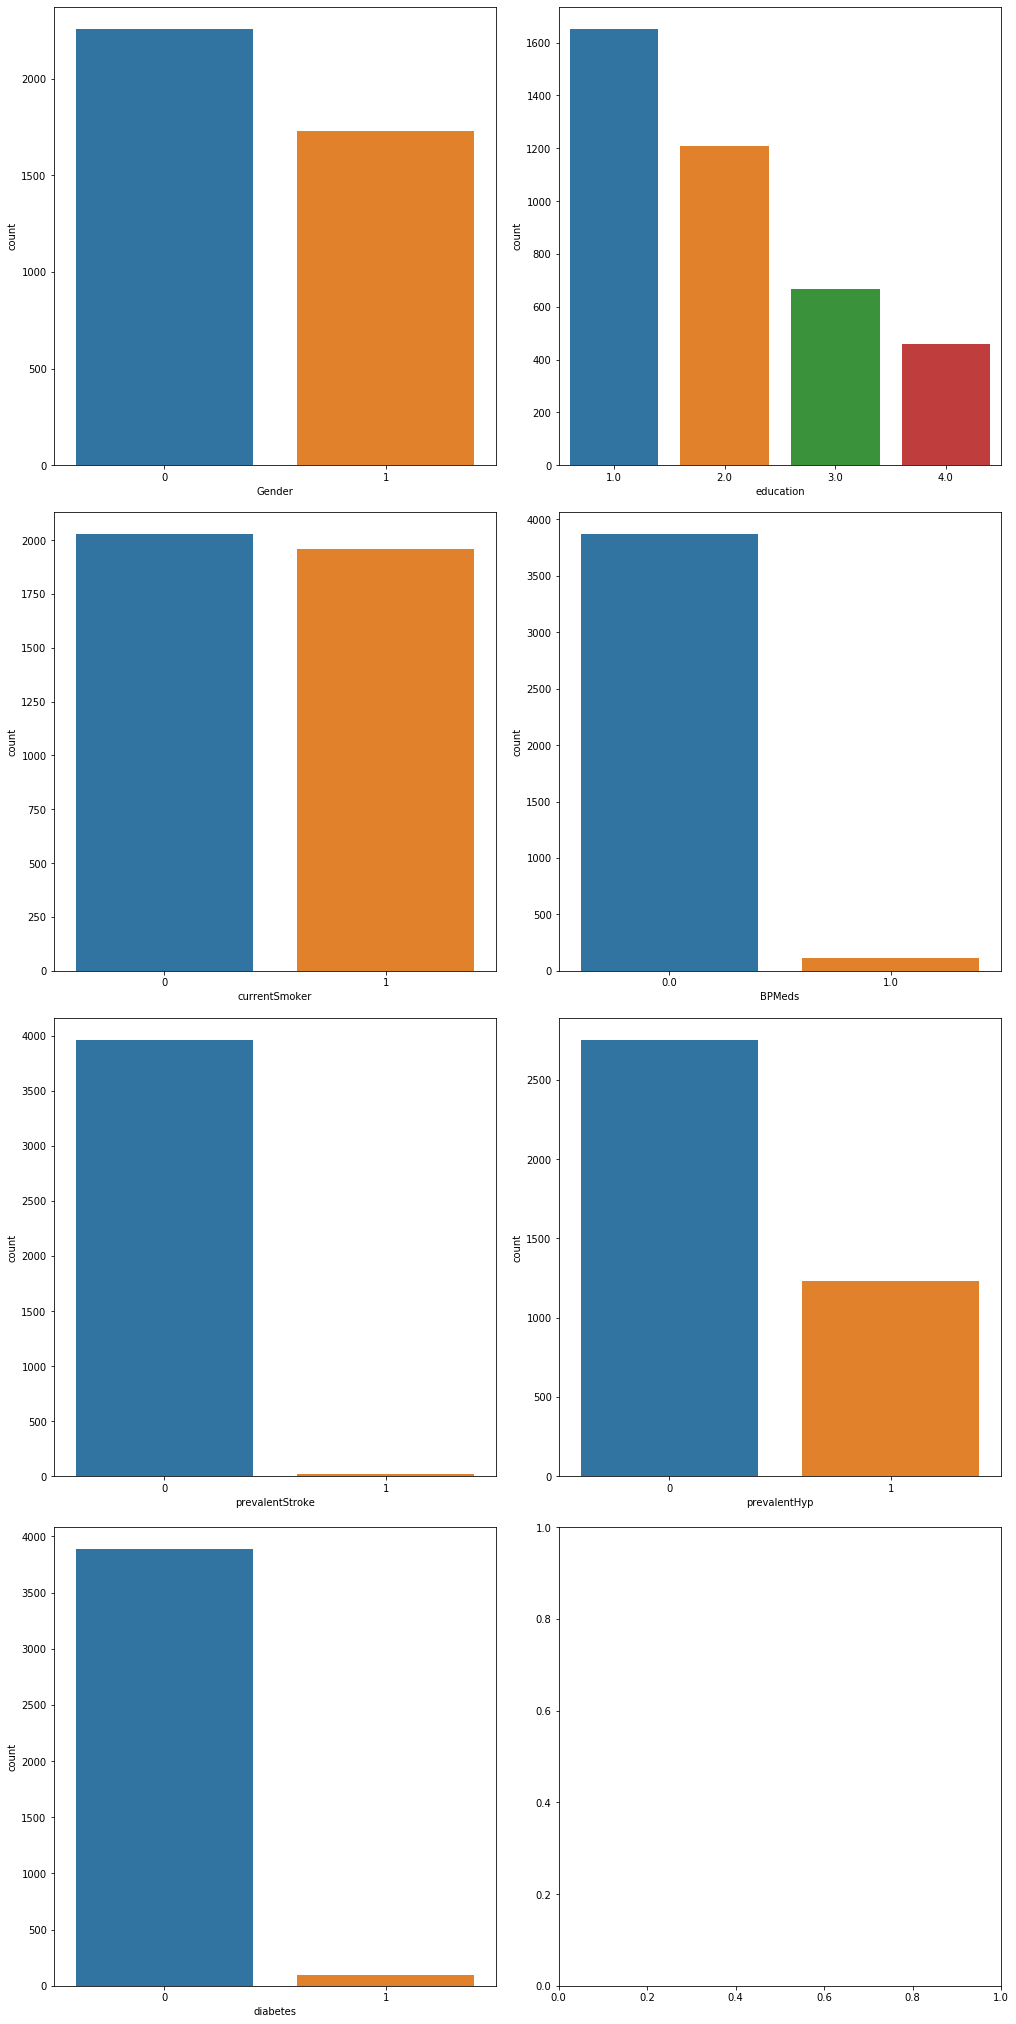

In [30]:
num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=df, ax=axs[row][pos])

Observation: BPmeds, prevalentStroke and diabetes are highly imbalanced. There are four levels of education whereas the rest categorical features are all binary. The number of Smokers and non-Smokers in currentSmoker is almost the same.

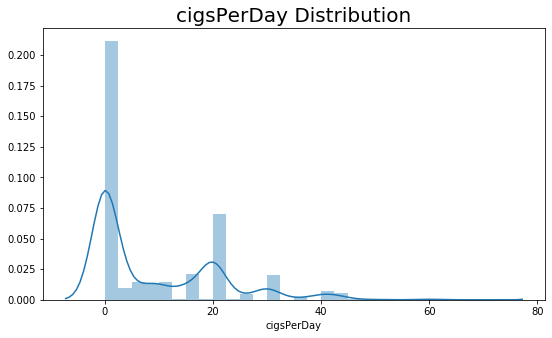

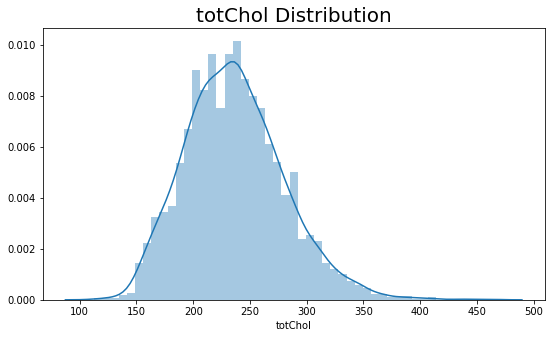

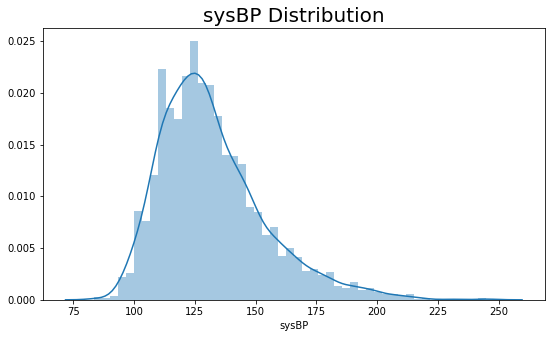

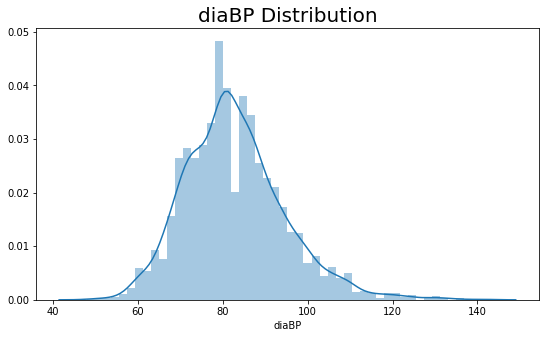

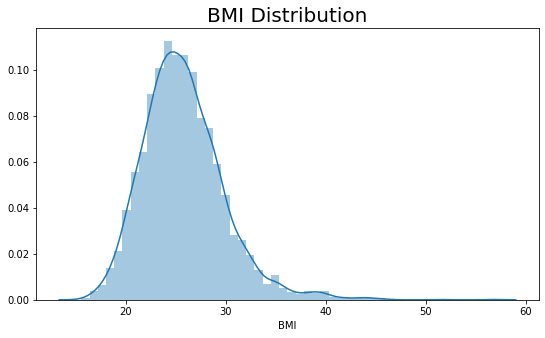

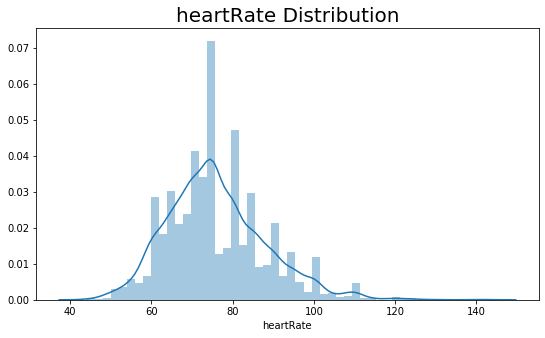

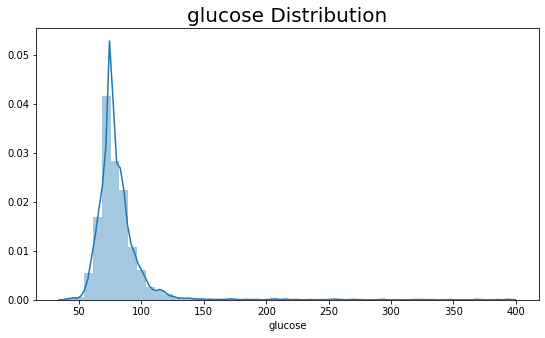

In [31]:
numeric_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for feature in numeric_features:
    plt.figure(figsize=(9, 5), facecolor='w')
    sns.distplot(df[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

In [32]:
graph_2 = df.groupby("Gender", as_index=False).TenYearCHD.sum()

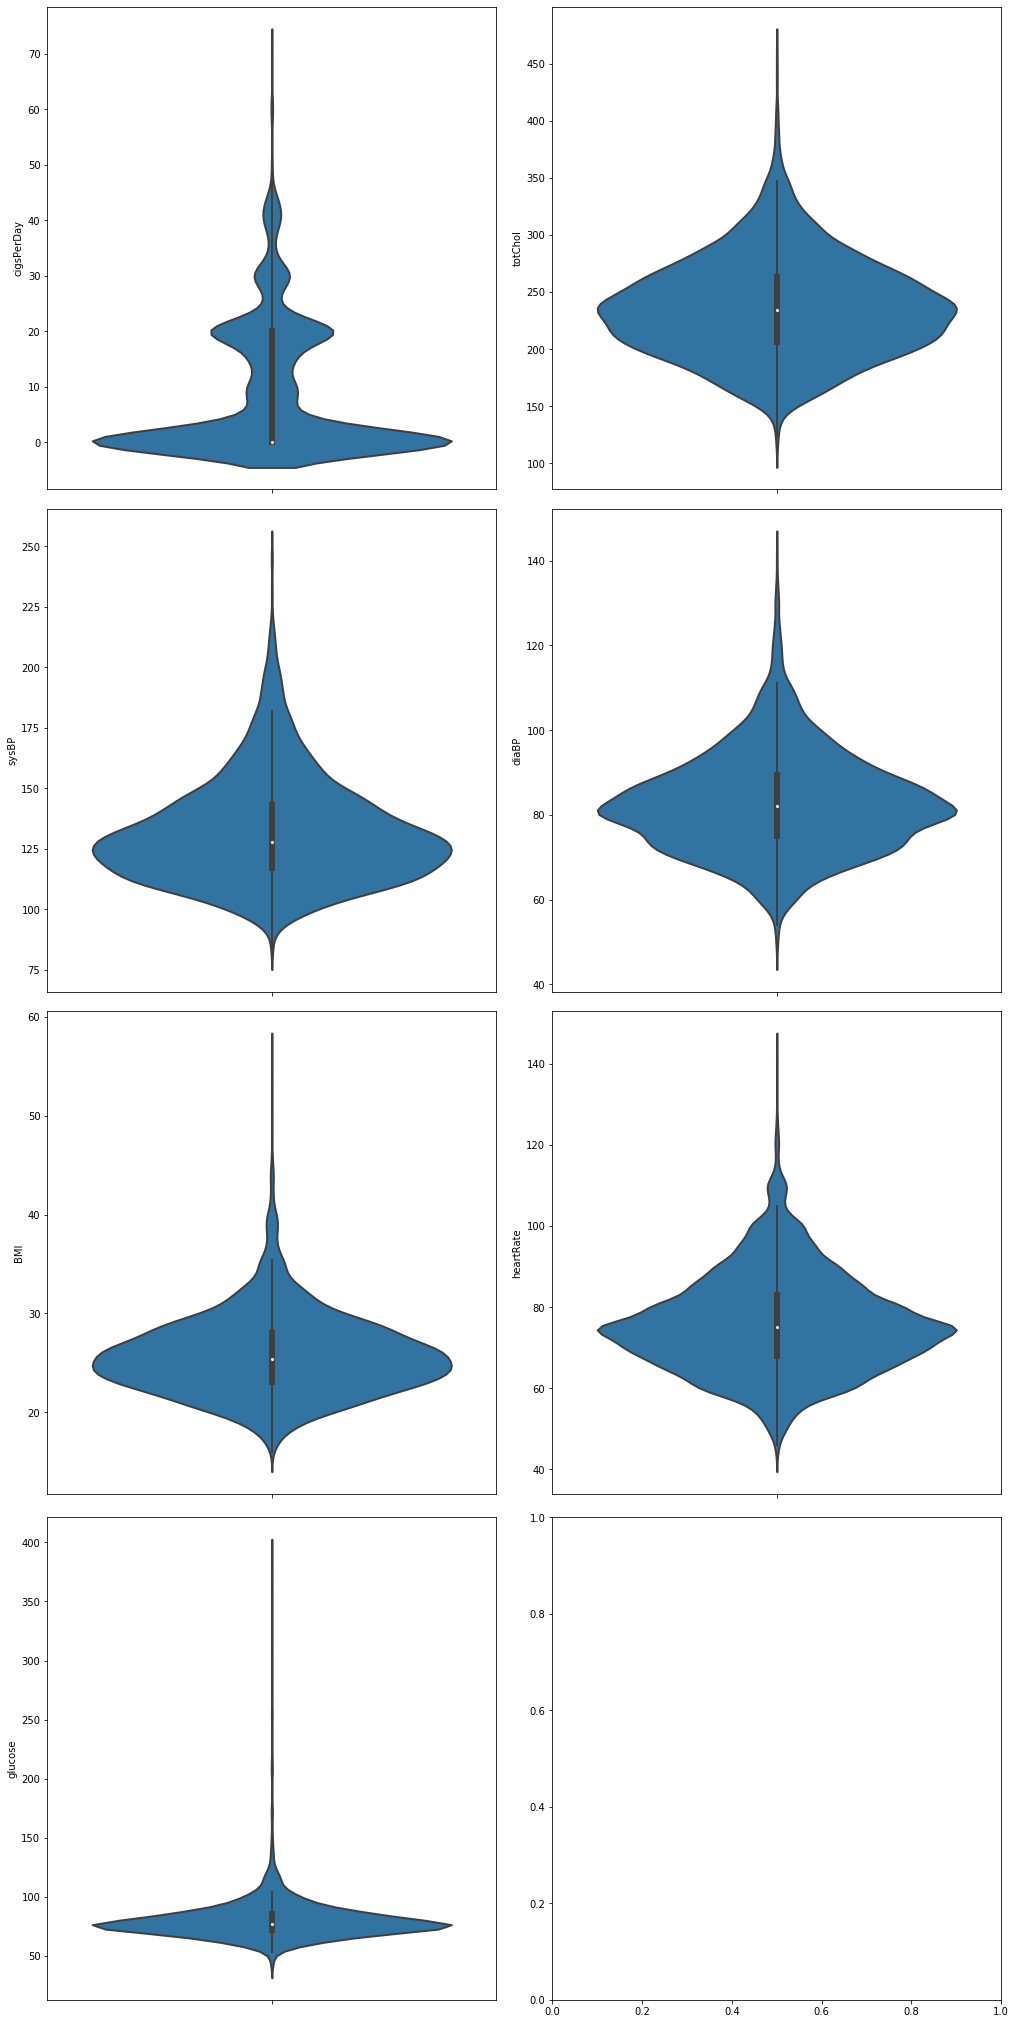

In [33]:
num_plots = len(numeric_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
color = ['m', 'g', 'b', 'r', 'y', 'v', 'o']
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(numeric_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.violinplot(y=var, data=df, ax=axs[row][pos], linewidth=2)

Observation: cigsPerDay has uneven distribution although most of the data is concentrated on 0. The majority portions of the following columns lie in the range: totChol: 150 to 300 sysBP: 100 to 150 diaBP: 60 to 100 BMI: 20 to 30 heartRate: 50 to 100 glucose: 50 to 150

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 8 Text yticklabel objects>)

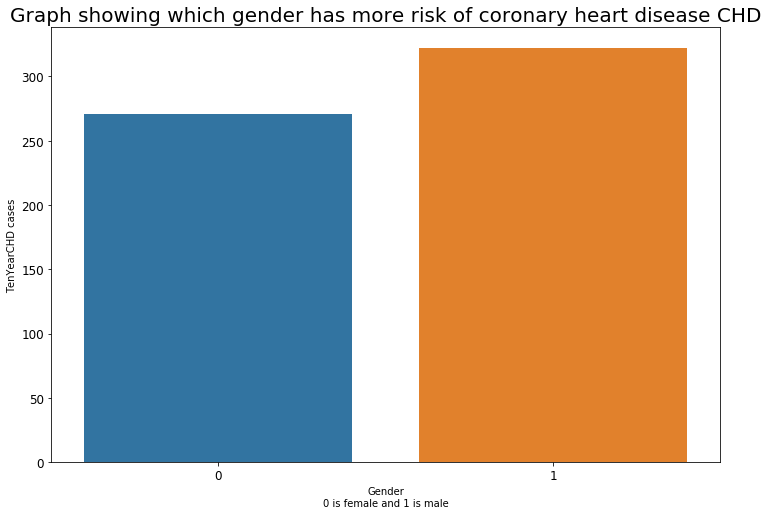

In [34]:
plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_2["Gender"], y=graph_2["TenYearCHD"])
plt.title("Graph showing which gender has more risk of coronary heart disease CHD", size=20)
plt.xlabel("Gender\n0 is female and 1 is male",size=10)
plt.ylabel("TenYearCHD cases", size=10)
plt.xticks(size=12)
plt.yticks(size=12)

Observation: Males have shown a slighly higher risk of coronary heart disease

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text yticklabel objects>)

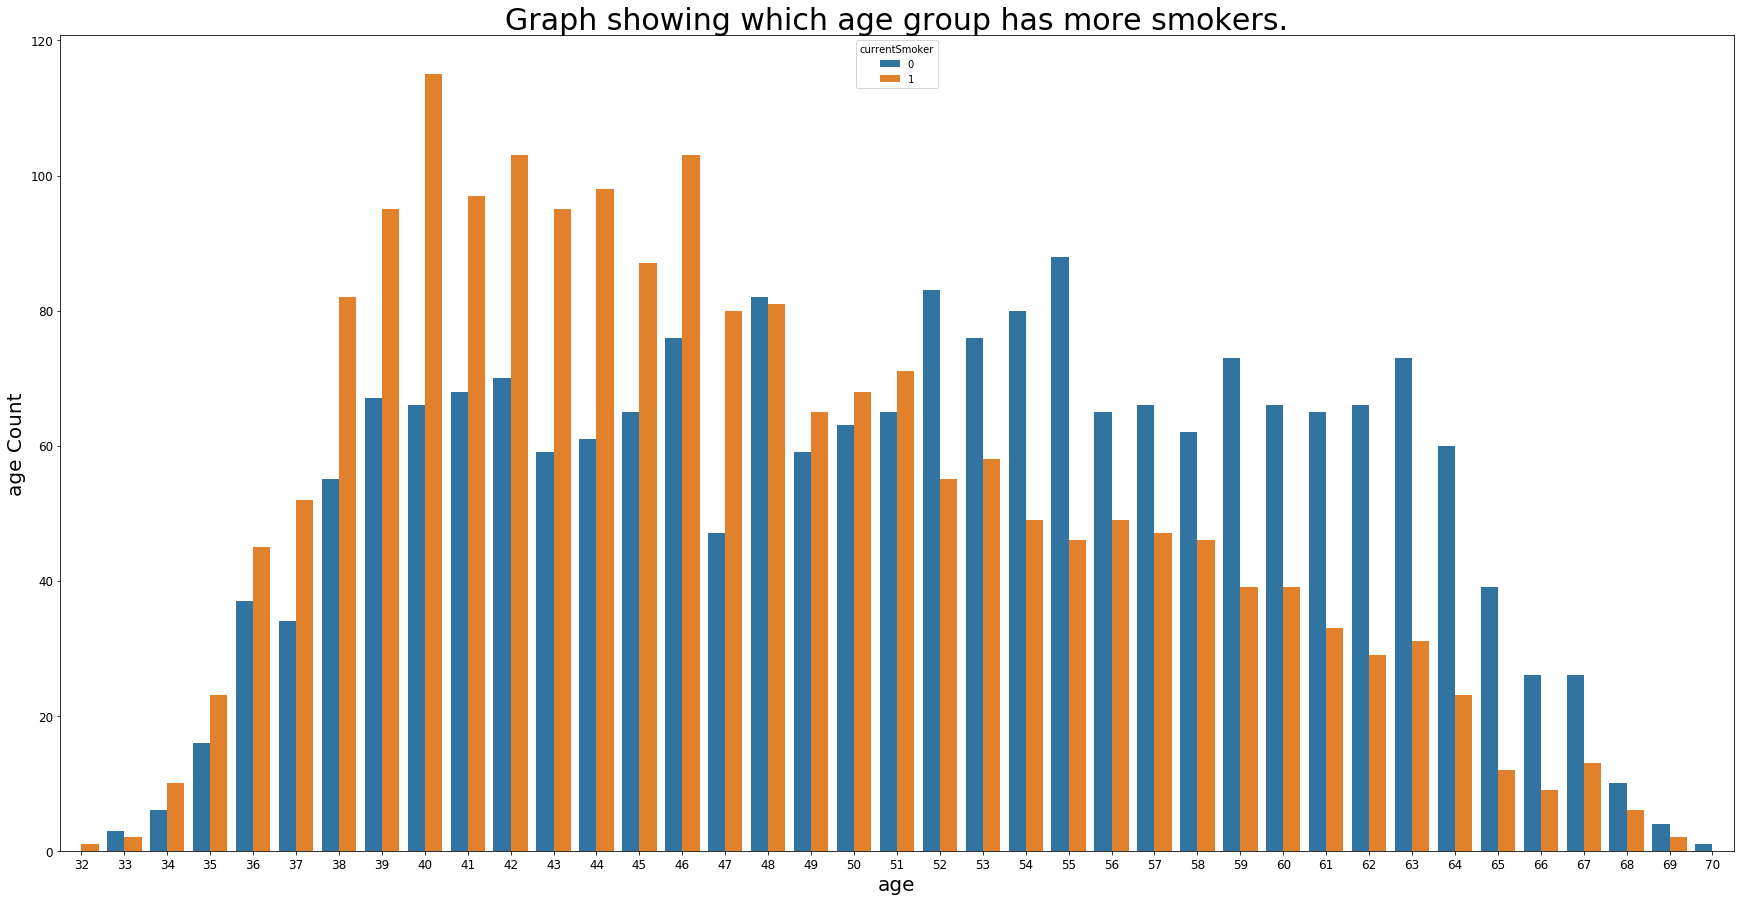

In [35]:
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x="age",data=df,hue="currentSmoker")
plt.title("Graph showing which age group has more smokers.", size=30)
plt.xlabel("age", size=20)
plt.ylabel("age Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

observation:Mid-age groups ranging from the age of 38 - 46 have more number of currentSmokers No currentSmokers observed below the age of 32 maximum age for a currentSmokers is 70

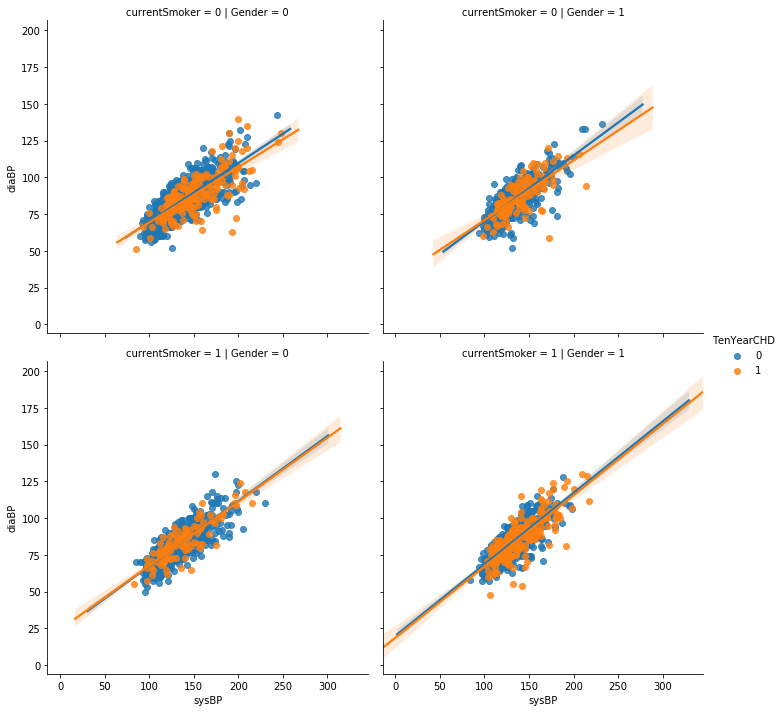

In [36]:
sns.lmplot('sysBP', 'diaBP', 
           data=df,
           hue="TenYearCHD",
           col="Gender",row="currentSmoker")
plt.show()

Observation:The above graph plots the relationship between systolic blood pressure and diastolic blood pressure for patients based on their gender and whether they are current smokers or not and plots the best fit line.

# IV. Feature Selection

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


X = df.iloc[:,0:14]  
y = df.iloc[:,-1]    

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(11,'Score'))  

              Specs       Score
10            sysBP  655.770648
1               age  307.383504
4        cigsPerDay  226.726642
9           totChol  196.235546
11            diaBP  143.641657
7      prevalentHyp   84.143595
5            BPMeds   31.490167
8          diabetes   28.893775
0            Gender   19.304479
12              BMI   13.329791
6   prevalentStroke    8.024787


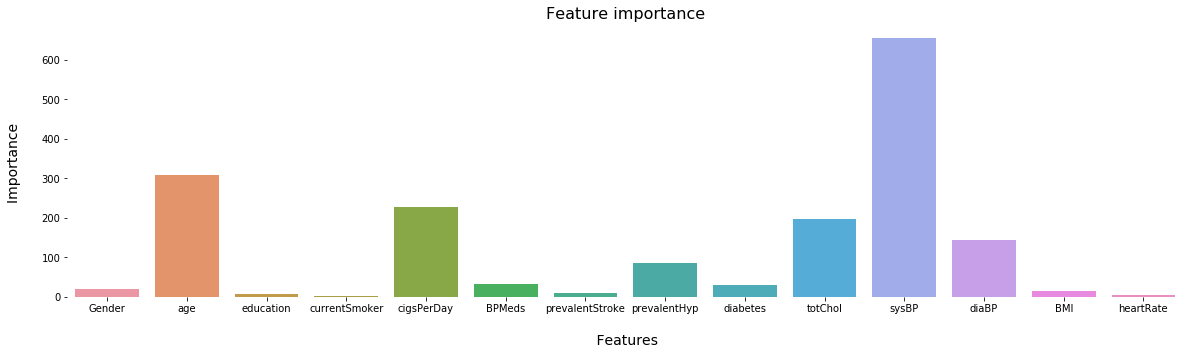

In [38]:
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores)
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks()
plt.yticks()
plt.show()

[]

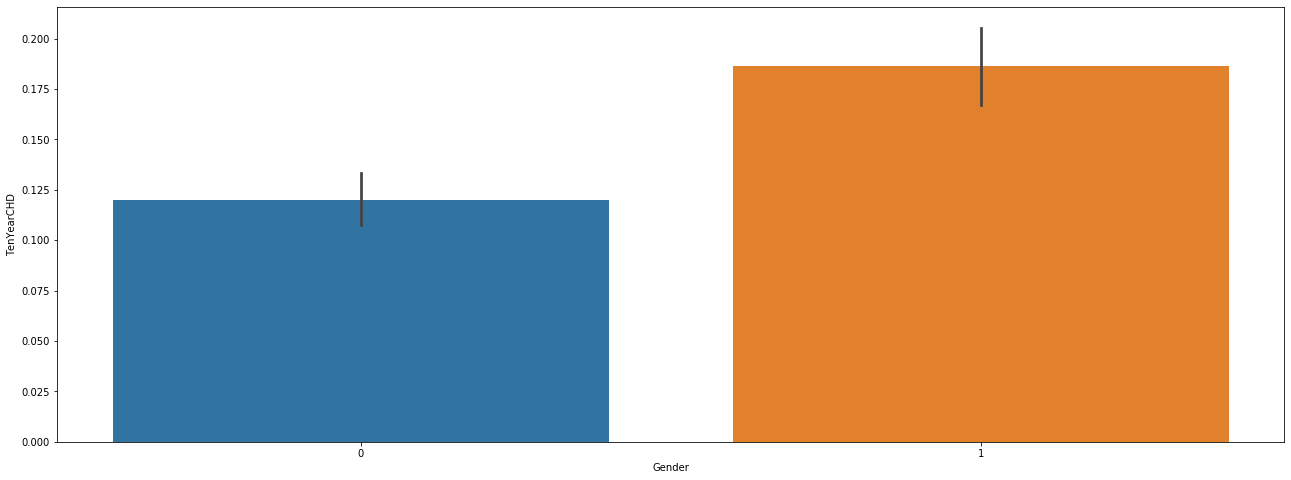

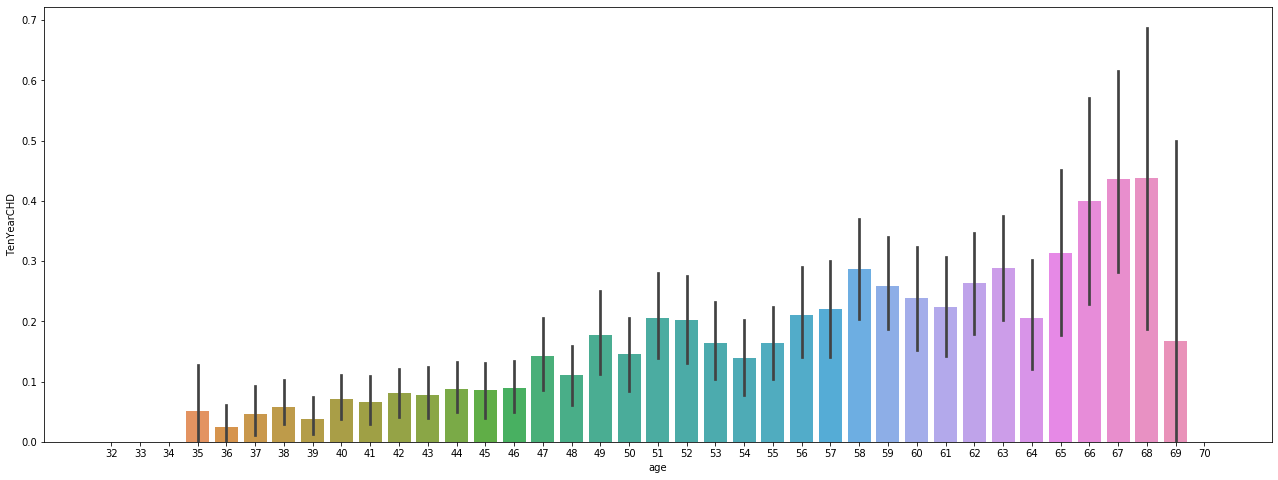

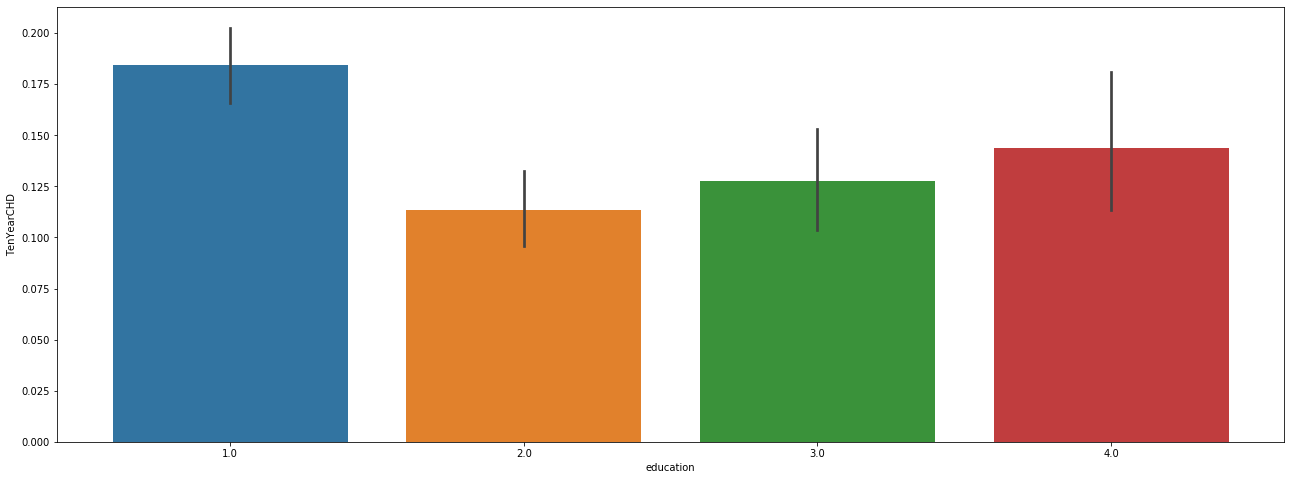

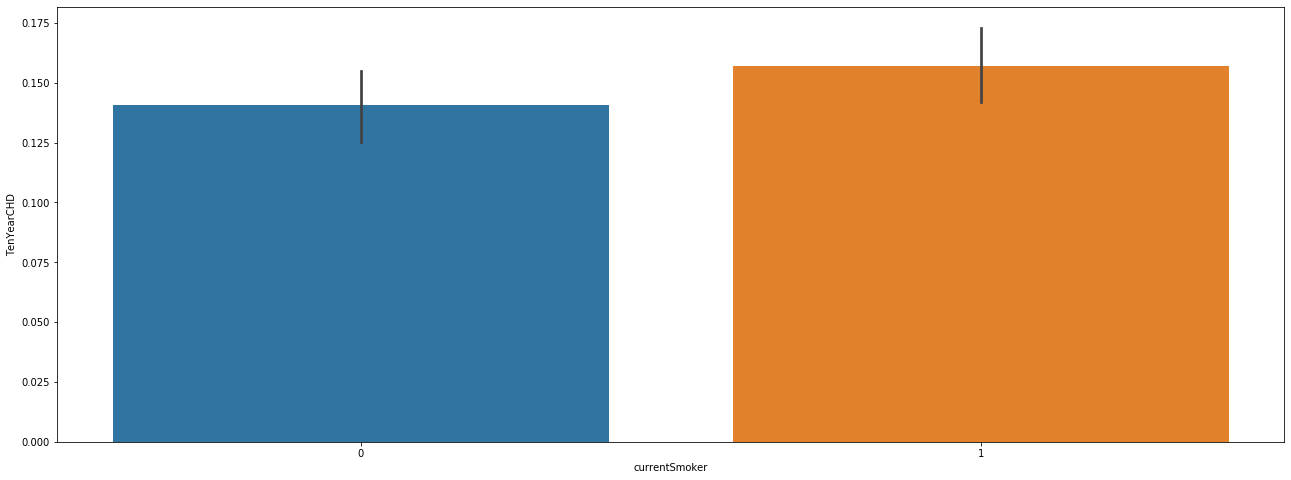

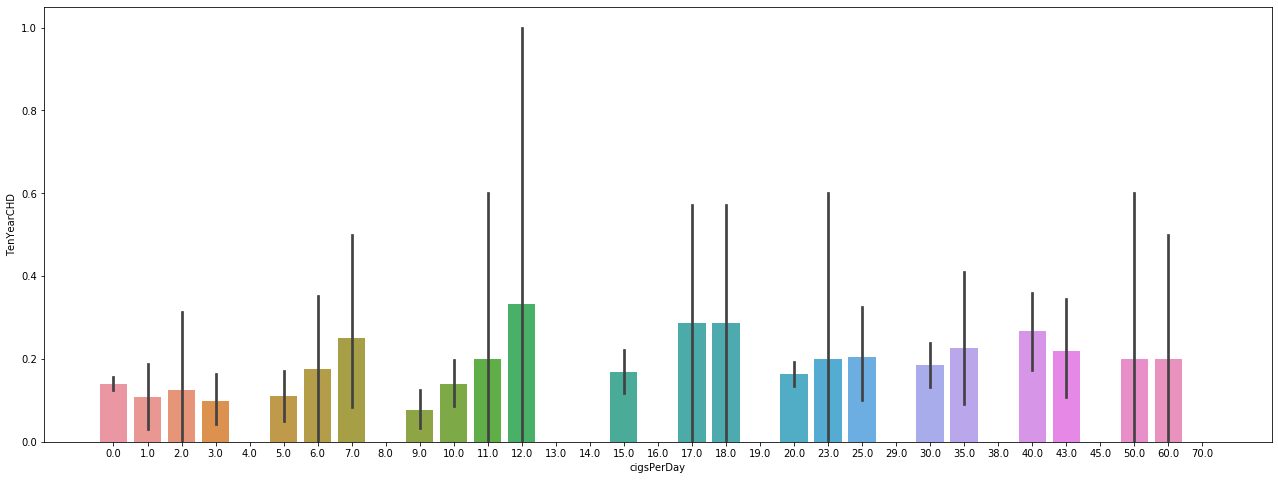

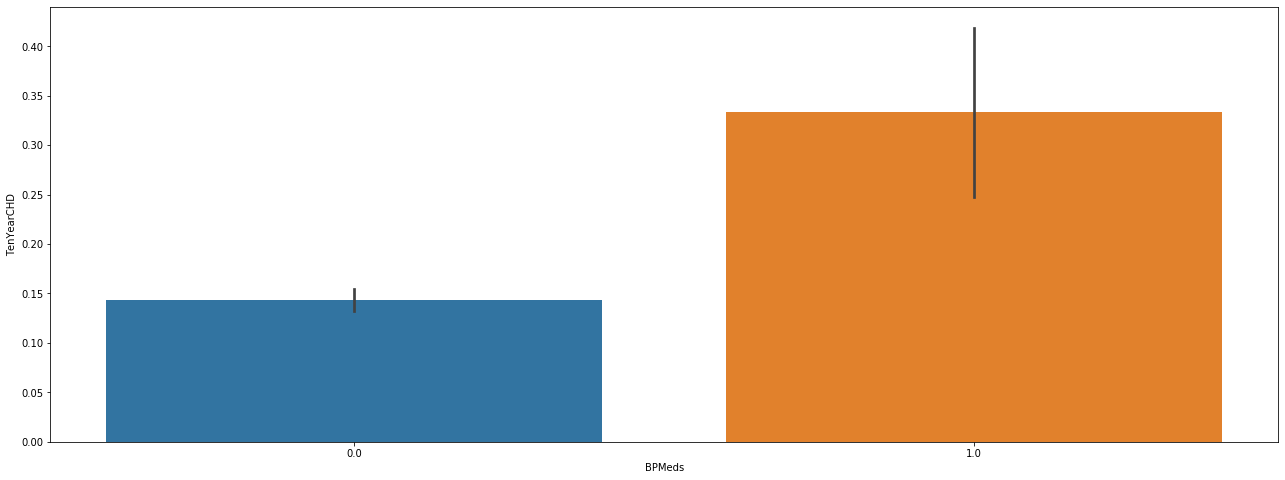

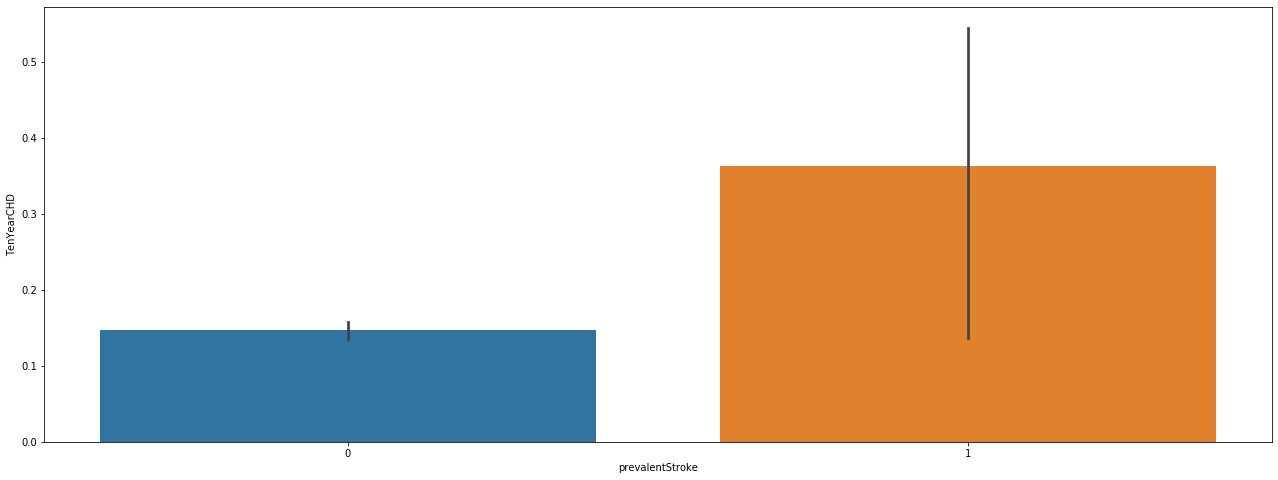

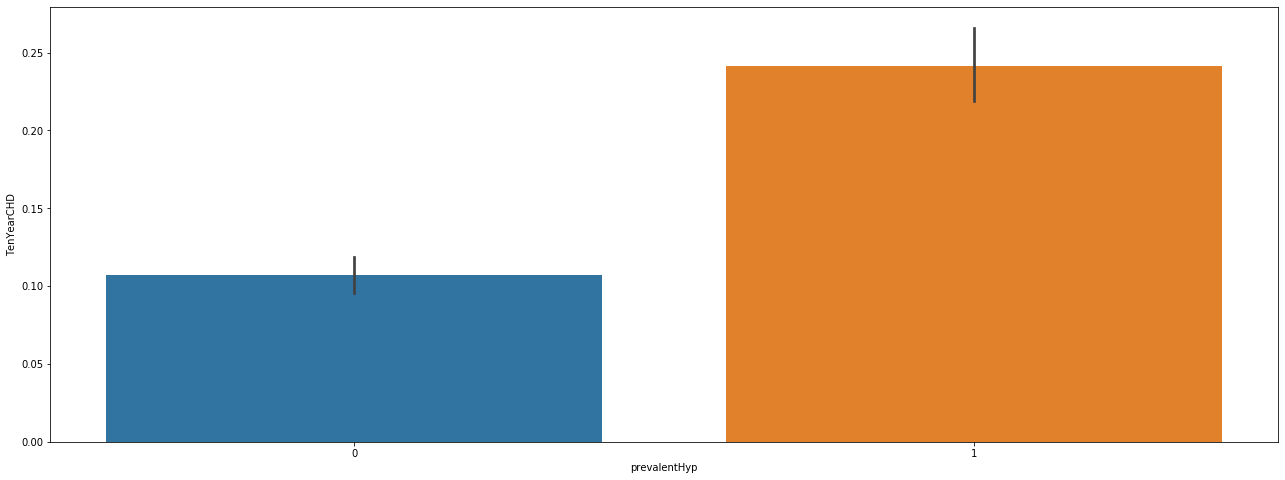

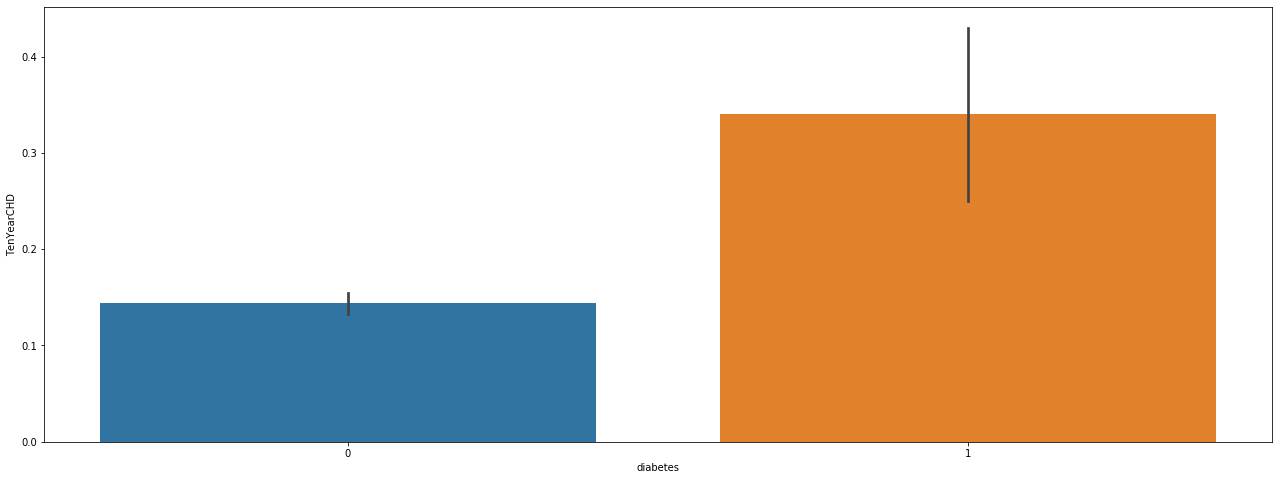

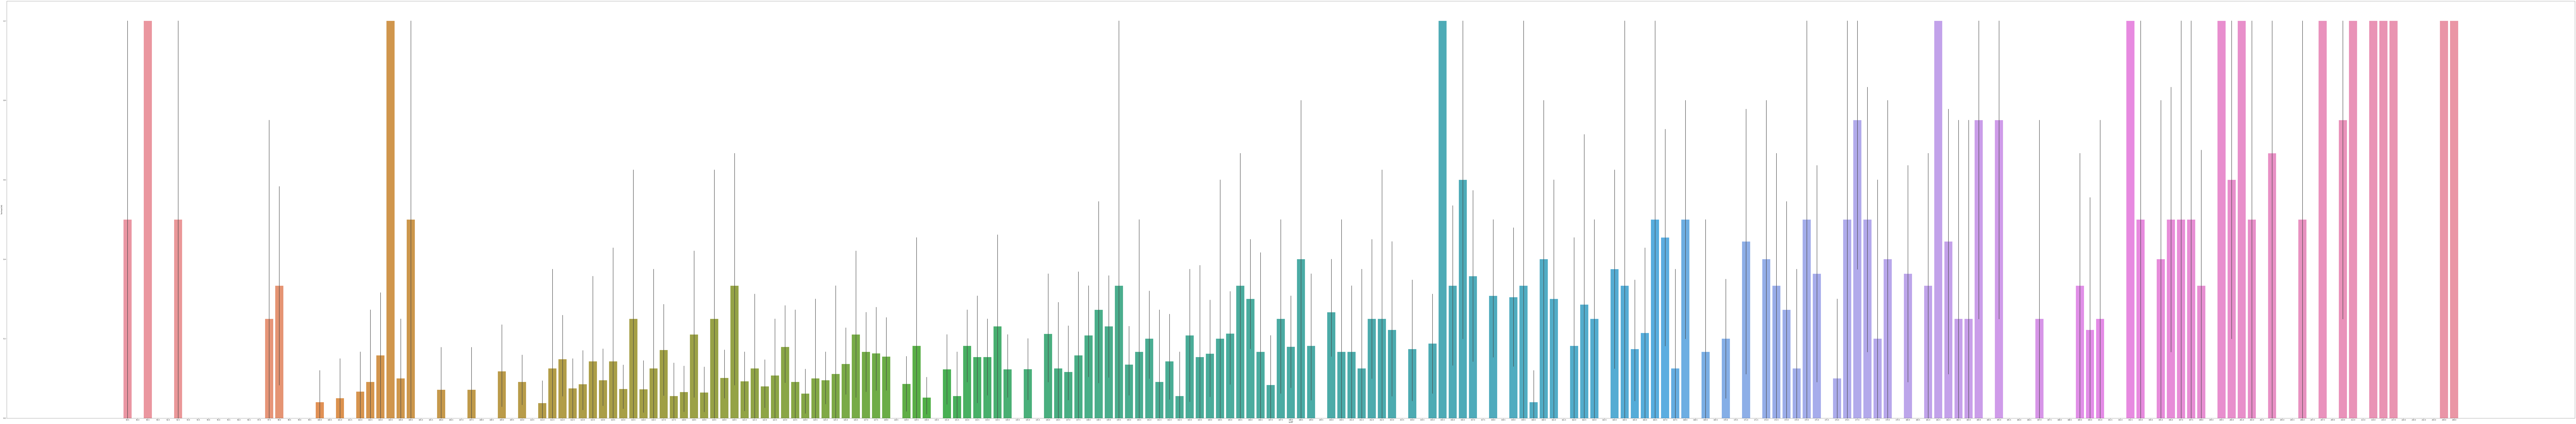

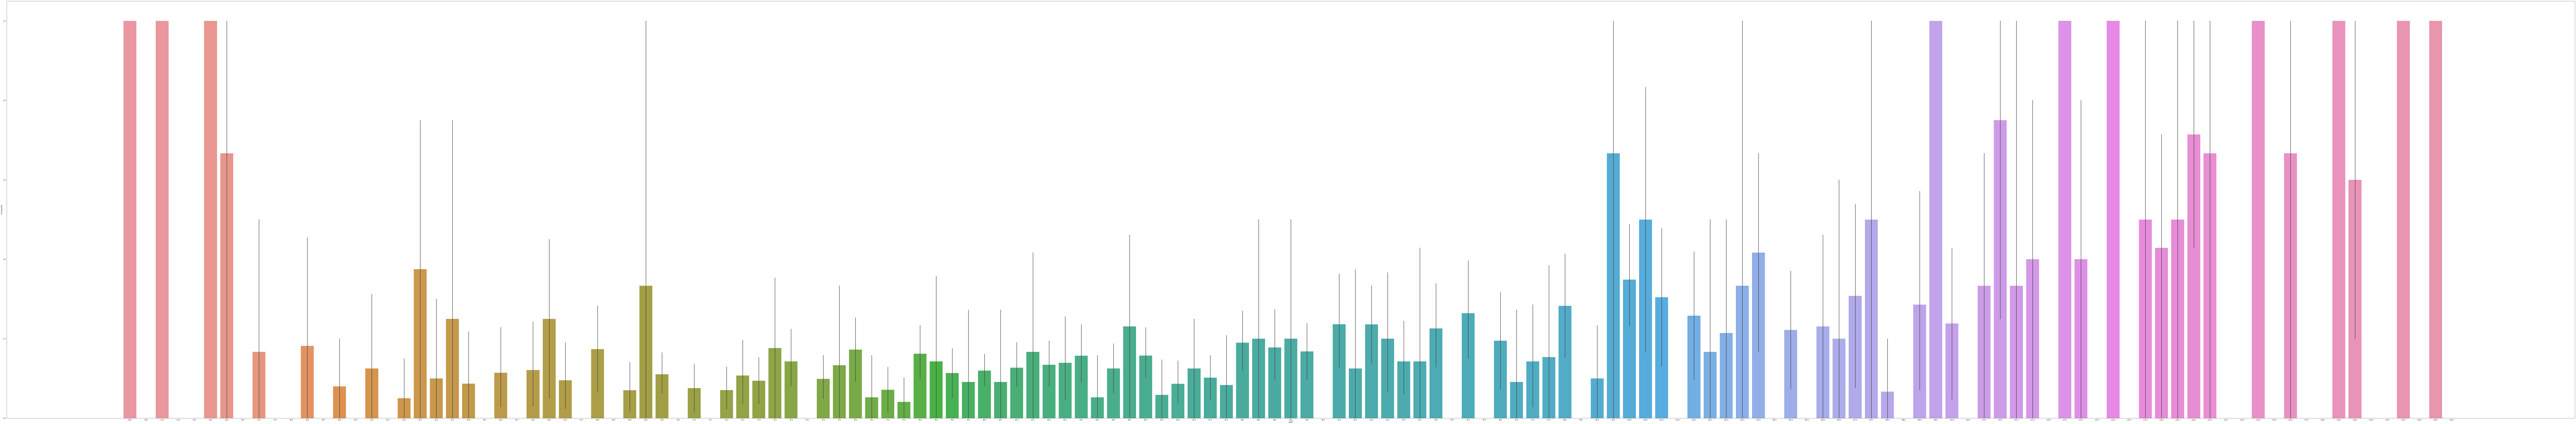

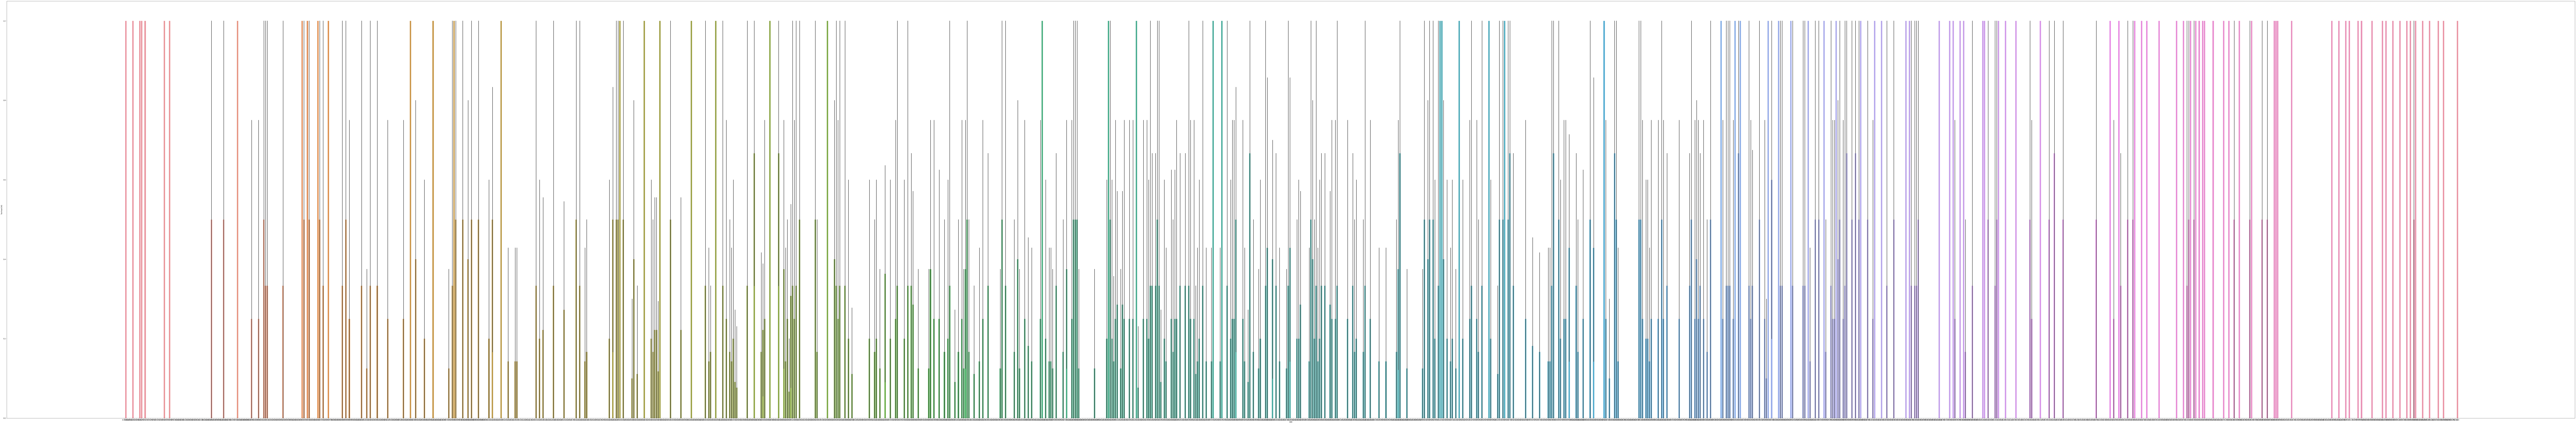

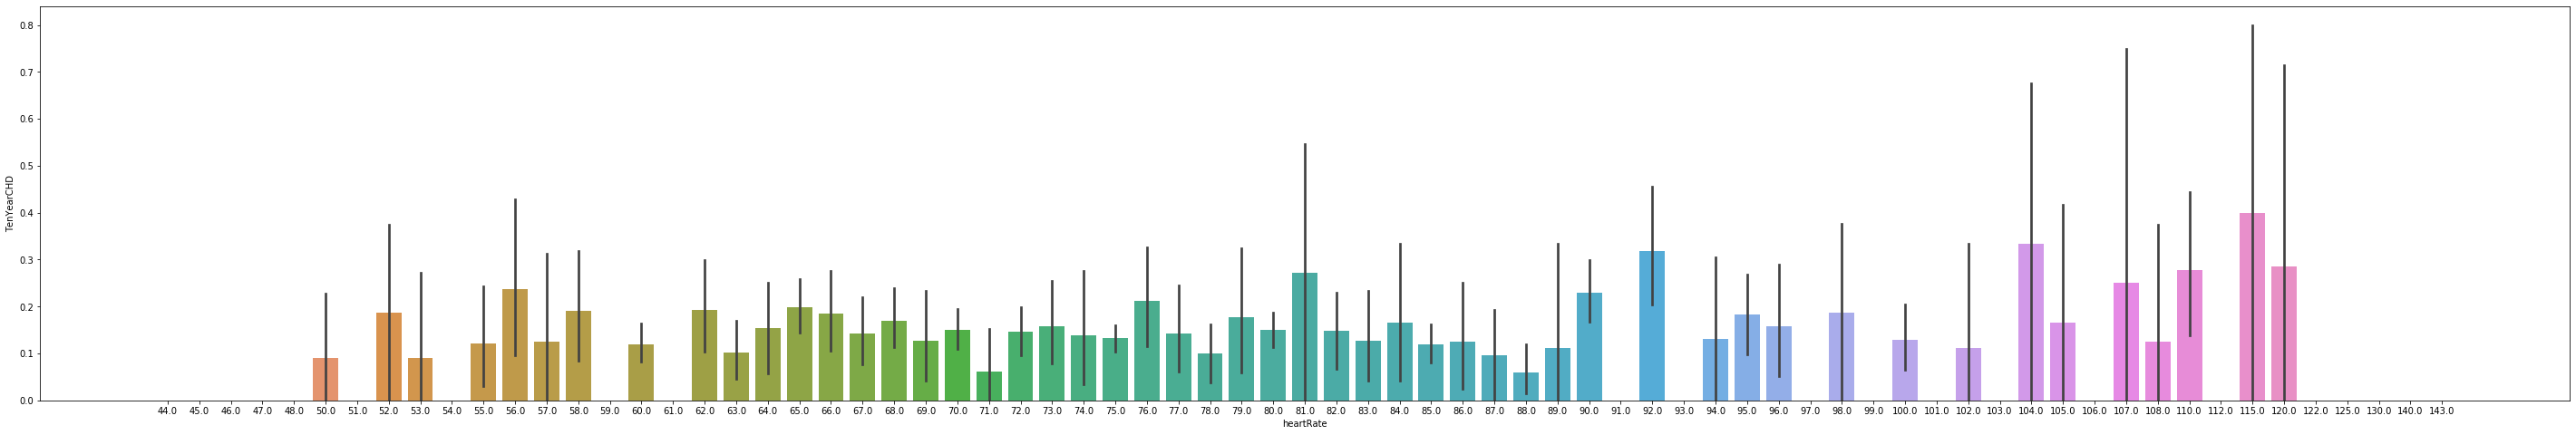

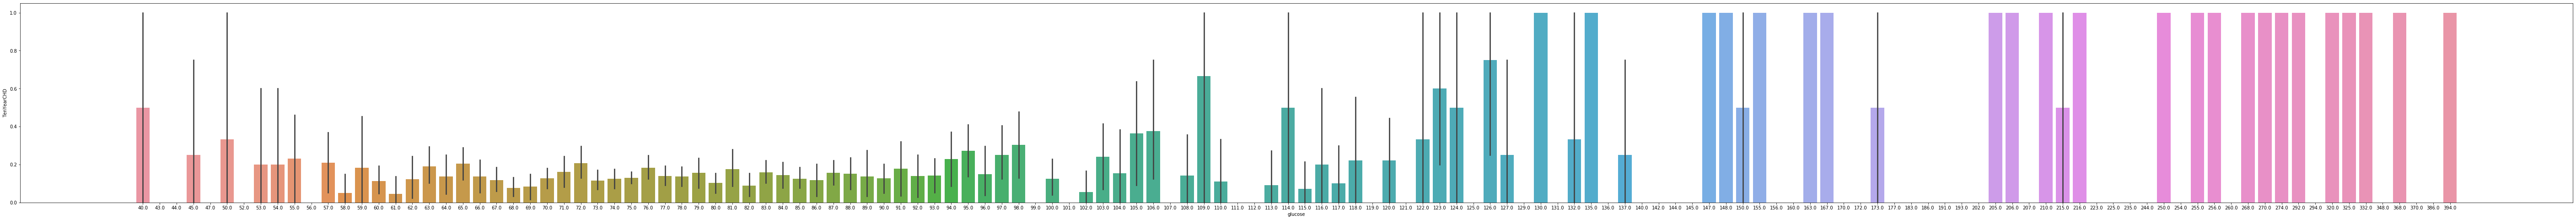

In [39]:
#currentSmoker,cigsPerDay,BPMeds,totChol,BMI,heartRate
plt.figure(figsize=(22,8), facecolor='w')
sns.barplot(x='Gender',y='TenYearCHD',data=df)
plt.plot()
plt.figure(figsize=(22,8), facecolor='w')
sns.barplot(x='age',y='TenYearCHD',data=df)
plt.plot()
plt.figure(figsize=(22,8), facecolor='w')
sns.barplot(x='education',y='TenYearCHD',data=df)
plt.plot()
plt.figure(figsize=(22,8), facecolor='w')
sns.barplot(x='currentSmoker',y='TenYearCHD',data=df)
plt.plot()
plt.figure(figsize=(22,8), facecolor='w')
sns.barplot(x='cigsPerDay',y='TenYearCHD',data=df)
plt.plot()
plt.figure(figsize=(22,8), facecolor='w')
sns.barplot(x='BPMeds',y='TenYearCHD',data=df)
plt.plot()
plt.figure(figsize=(22,8), facecolor='w')
sns.barplot(x='prevalentStroke',y='TenYearCHD',data=df)
plt.plot()
plt.figure(figsize=(22,8), facecolor='w')
sns.barplot(x='prevalentHyp',y='TenYearCHD',data=df)
plt.plot()
plt.figure(figsize=(22,8), facecolor='w')
sns.barplot(x='diabetes',y='TenYearCHD',data=df)
plt.plot()
plt.figure(figsize=(300,100), facecolor='w')
sns.barplot(x='totChol',y='TenYearCHD',data=df)
plt.plot()
plt.figure(figsize=(300,50), facecolor='w')
sns.barplot(x='sysBP',y='TenYearCHD',data=df)
plt.plot()
plt.figure(figsize=(300,50), facecolor='w')
sns.barplot(x='diaBP',y='TenYearCHD',data=df)
plt.plot()
plt.figure(figsize=(300,50), facecolor='w')
sns.barplot(x='BMI',y='TenYearCHD',data=df)
plt.plot()
plt.figure(figsize=(50,8), facecolor='w')
sns.barplot(x='heartRate',y='TenYearCHD',data=df)
plt.plot()
plt.figure(figsize=(100,8), facecolor='w')
sns.barplot(x='glucose',y='TenYearCHD',data=df)
plt.plot()

# V. Dropping Columns

Based on the above graphs, we see that some fields can be dropped such as currentSmoker, BMI, education, prevalentStroke, and heartRate as their effect is insignificant to the TenYearCHD

In [40]:
print(df.head())
df.drop(['currentSmoker','BMI','education','prevalentStroke','heartRate'],axis=1,inplace=True)
df.head()#keeping 10 major features

   Gender  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0       1   39        4.0              0         0.0     0.0                0   
1       0   46        2.0              0         0.0     0.0                0   
2       1   48        1.0              1        20.0     0.0                0   
3       0   61        3.0              1        30.0     0.0                0   
4       0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1     

,Gender,age,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,glucose,TenYearCHD
0,1,39,0.0,0.0,0,0,195.0,106.0,70.0,77.0,0
1,0,46,0.0,0.0,0,0,250.0,121.0,81.0,76.0,0
2,1,48,20.0,0.0,0,0,245.0,127.5,80.0,70.0,0
3,0,61,30.0,0.0,1,0,225.0,150.0,95.0,103.0,1
4,0,46,23.0,0.0,0,0,285.0,130.0,84.0,85.0,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3987 entries, 0 to 4239
Data columns (total 11 columns):
Gender          3987 non-null int64
age             3987 non-null int64
cigsPerDay      3987 non-null float64
BPMeds          3987 non-null float64
prevalentHyp    3987 non-null int64
diabetes        3987 non-null int64
totChol         3987 non-null float64
sysBP           3987 non-null float64
diaBP           3987 non-null float64
glucose         3987 non-null float64
TenYearCHD      3987 non-null int64
dtypes: float64(6), int64(5)
memory usage: 533.8 KB


In [42]:
df.describe()

,Gender,age,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,glucose,TenYearCHD
count,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000
mean,0.433409,49.469526,9.027840,0.029345,0.309255,0.025082,236.502132,132.177452,82.849887,81.272385,0.148733
std,0.495608,8.531325,11.918332,0.168794,0.462244,0.156392,43.653337,21.793408,11.854644,22.954842,0.355870
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,77.000000,0.000000
75%,1.000000,56.000000,20.000000,0.000000,1.000000,0.000000,263.000000,143.000000,89.500000,85.000000,0.000000
max,1.000000,70.000000,70.000000,1.000000,1.000000,1.000000,464.000000,248.000000,142.500000,394.000000,1.000000


In [43]:
df.shape

(3987, 11)

In [44]:
df.dtypes

Gender            int64
age               int64
cigsPerDay      float64
BPMeds          float64
prevalentHyp      int64
diabetes          int64
totChol         float64
sysBP           float64
diaBP           float64
glucose         float64
TenYearCHD        int64
dtype: object

In [45]:
df['cigsPerDay'] = df['cigsPerDay'].astype(dtype='int64')
df['BPMeds'] = df['BPMeds'].astype(dtype='int64')
df['totChol'] = df['totChol'].astype(dtype='int64')
df['glucose'] = df['glucose'].astype(dtype='int64')
df.dtypes

Gender            int64
age               int64
cigsPerDay        int64
BPMeds            int64
prevalentHyp      int64
diabetes          int64
totChol           int64
sysBP           float64
diaBP           float64
glucose           int64
TenYearCHD        int64
dtype: object

In [46]:
df_new = df

# VI. Training and Testing Datasets

In [47]:
scaler = MinMaxScaler(feature_range=(0,1)) 
df_scaled= pd.DataFrame(scaler.fit_transform(df_new), columns=df_new.columns)

In [48]:
df_scaled.describe()
df.describe()

,Gender,age,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,glucose,TenYearCHD
count,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000
mean,0.433409,49.469526,9.027840,0.029345,0.309255,0.025082,236.502132,132.177452,82.849887,81.272385,0.148733
std,0.495608,8.531325,11.918332,0.168794,0.462244,0.156392,43.653337,21.793408,11.854644,22.954842,0.355870
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,77.000000,0.000000
75%,1.000000,56.000000,20.000000,0.000000,1.000000,0.000000,263.000000,143.000000,89.500000,85.000000,0.000000
max,1.000000,70.000000,70.000000,1.000000,1.000000,1.000000,464.000000,248.000000,142.500000,394.000000,1.000000


In [49]:
y = df['TenYearCHD']
X = df_scaled.drop(['TenYearCHD'], axis = 1)

# divide train test: 60 % - 40 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=29)

In [50]:
print(len(X_train))
print(len(X_test))

2392
1595


Class 0: 3394
Class 1: 593
Proportion: 5.72 : 1


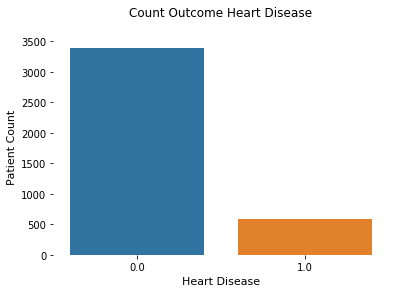

In [51]:
target_count = df_scaled.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(df_scaled.TenYearCHD)
plt.box(False)
plt.xlabel('Heart Disease',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.show()

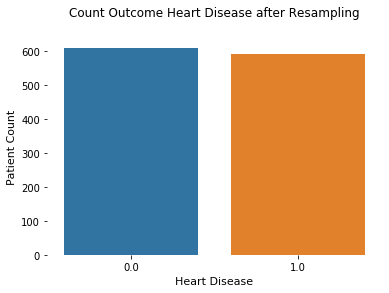

In [52]:
# Shuffle df
shuffled_df = df_scaled.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = df_scaled.loc[shuffled_df['TenYearCHD'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = df_scaled.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()

# plot new count
sns.countplot(normalized_df.TenYearCHD)
plt.box(False)
plt.xlabel('Heart Disease',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

# VII. Models

## 1. Logistic Regression 

In [53]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
normalized_df_logreg_pred = logreg.predict(X_test)

C:\Users\vedan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [54]:
acc = accuracy_score(y_test, normalized_df_logreg_pred)
print(f"Accuracy Score: {round(acc,3)*100}%")
f1 = f1_score(y_test, normalized_df_logreg_pred)
print(f"f1 Score: {round(f1,3)*100}%")
precision = precision_score(y_test, normalized_df_logreg_pred)
print(f"Precision score: {round(precision,3)*100}%")
recall = recall_score(y_test, normalized_df_logreg_pred)
print(f"Recall Score: {round(recall,3)*100}%")

Accuracy Score: 84.0%
f1 Score: 1.5%
Precision score: 40.0%
Recall Score: 0.8%


## 2. KNN

In [55]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
normalized_df_knn_pred = knn.predict(X_test)

In [56]:
acc = accuracy_score(y_test, normalized_df_knn_pred)
print(f"Accuracy Score: {round(acc,3)*100}%")
f1 = f1_score(y_test, normalized_df_knn_pred)
print(f"f1 Score: {round(f1,3)*100}%")
precision = precision_score(y_test, normalized_df_knn_pred)
print(f"Precision score: {round(precision,3)*100}%")
recall = recall_score(y_test, normalized_df_knn_pred)
print(f"Recall Score: {round(recall,3)*100}%")

Accuracy Score: 83.1%
f1 Score: 11.200000000000001%
Precision score: 34.699999999999996%
Recall Score: 6.7%


## 3. Decision Tree Classifier

In [57]:
dtc_up = DecisionTreeClassifier()
dtc_up.fit(X_train, y_train)
normalized_df_dtc_pred = dtc_up.predict(X_test)

In [58]:
acc = accuracy_score(y_test, normalized_df_dtc_pred)
print(f"Accuracy Score: {round(acc,3)*100}%")
f1 = f1_score(y_test, normalized_df_dtc_pred)
print(f"f1 Score: {round(f1,3)*100}%")
precision = precision_score(y_test, normalized_df_dtc_pred)
print(f"Precision score: {round(precision,3)*100}%")
recall = recall_score(y_test, normalized_df_dtc_pred)
print(f"Recall Score: {round(recall,3)*100}%")

Accuracy Score: 74.9%
f1 Score: 25.3%
Precision score: 24.0%
Recall Score: 26.8%


## 4. Support Vector Machine

In [59]:
svm = SVC()
svm.fit(X_train, y_train)
normalized_df_svm_pred = svm.predict(X_test)

C:\Users\vedan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [60]:
acc = accuracy_score(y_test, normalized_df_svm_pred)
print(f"Accuracy Score: {round(acc,3)*100}%")
f1 = f1_score(y_test, normalized_df_svm_pred)
print(f"f1 Score: {round(f1,3)*100}%")
precision = precision_score(y_test, normalized_df_svm_pred)
print(f"Precision score: {round(precision,3)*100}%")
recall = recall_score(y_test, normalized_df_svm_pred)
print(f"Recall Score: {round(recall,3)*100}%")

Accuracy Score: 84.1%
f1 Score: 0.0%
Precision score: 0.0%
Recall Score: 0.0%


C:\Users\vedan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vedan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## 5. Random Forest Classifier

In [61]:
rfc =  RandomForestClassifier()
rfc.fit(X_train, y_train)
normalized_df_rfc_pred = rfc.predict(X_test)

C:\Users\vedan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [62]:
acc = accuracy_score(y_test, normalized_df_rfc_pred)
print(f"Accuracy Score: {round(acc,3)*100}%")
f1 = f1_score(y_test, normalized_df_rfc_pred)
print(f"f1 Score: {round(f1,3)*100}%")
precision = precision_score(y_test, normalized_df_rfc_pred)
print(f"Precision score: {round(precision,3)*100}%")
recall = recall_score(y_test, normalized_df_rfc_pred)
print(f"Recall Score: {round(recall,3)*100}%")

Accuracy Score: 83.1%
f1 Score: 10.6%
Precision score: 34.0%
Recall Score: 6.3%


## 6. Naive Bayes

In [63]:
nb =  GaussianNB()
nb.fit(X_train, y_train)
normalized_df_gnb_pred = nb.predict(X_test)

In [64]:
acc = accuracy_score(y_test, normalized_df_gnb_pred)
print(f"Accuracy Score: {round(acc,3)*100}%")
f1 = f1_score(y_test, normalized_df_gnb_pred)
print(f"f1 Score: {round(f1,3)*100}%")
precision = precision_score(y_test, normalized_df_gnb_pred)
print(f"Precision score: {round(precision,3)*100}%")
recall = recall_score(y_test, normalized_df_gnb_pred)
print(f"Recall Score: {round(recall,3)*100}%")

Accuracy Score: 82.0%
f1 Score: 27.700000000000003%
Precision score: 38.5%
Recall Score: 21.7%


### Saving f1 Scores and Comparing Accuracy

In [65]:

df2 = {'Model':['Logistic Regression','KNN','Decision Tree','SVM','Random Forest','Naive Bayes'],
        'F1 Score':[6.60,12.5,22.7,1.70,13.0,27.7],'Accuracies':[84.89,84.1,74.1,84.7,83.89,81.8],'Recall':[3.40,7.30,24.6,0.89,7.80,20.70],'Precision':[72.70,41.50,21.00,100.00,40.00,35.00]}
y_pred = pd.DataFrame(df2)
y_pred

,Model,F1 Score,Accuracies,Recall,Precision
0,Logistic Regression,6.6,84.89,3.40,72.7
1,KNN,12.5,84.10,7.30,41.5
2,Decision Tree,22.7,74.10,24.60,21.0
3,SVM,1.7,84.70,0.89,100.0
4,Random Forest,13.0,83.89,7.80,40.0
5,Naive Bayes,27.7,81.80,20.70,35.0


In [66]:
df2['Accuracies']

[84.89, 84.1, 74.1, 84.7, 83.89, 81.8]

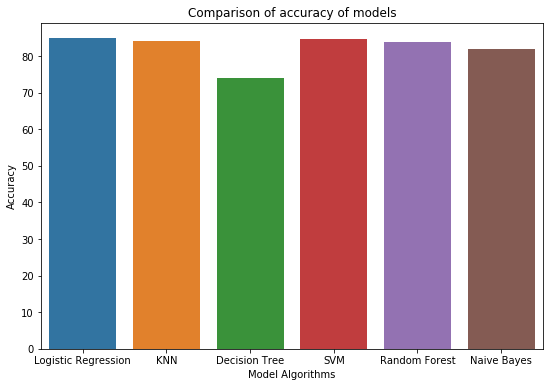

In [67]:
plt.figure(figsize=(9,6))
sns.barplot(x=df2['Model'], y=df2['Accuracies'], data = df)
plt.title('Comparison of accuracy of models')
plt.xlabel('Model Algorithms')
plt.ylabel('Accuracy')
plt.show()

In [68]:
acc_test = logreg.score(X_test, y_test)
print("The accuracy score of the test data is: ",acc_test*100,"%")
acc_train = logreg.score(X_train, y_train)
print("The accuracy score of the training data is: ",round(acc_train*100,2),"%")

The accuracy score of the test data is:  84.01253918495298 %
The accuracy score of the training data is:  86.54 %


# Confusion Matrix

Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

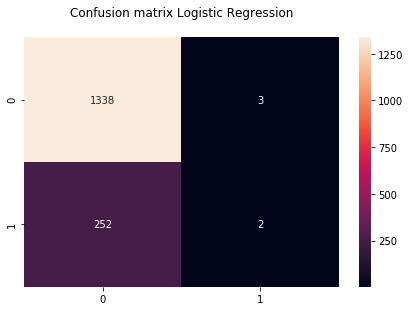

In [69]:
cnf_matrix_logreg = confusion_matrix(y_test, normalized_df_logreg_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_logreg), annot=True, fmt='g')
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

# ROC 

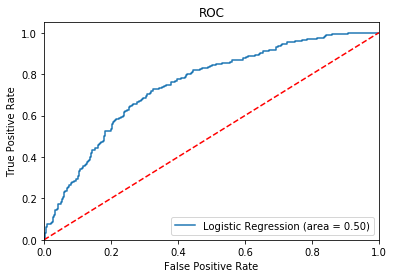

In [70]:
logit_roc_auc = roc_auc_score(y_test, normalized_df_logreg_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [71]:
df2['F1 Score']

[6.6, 12.5, 22.7, 1.7, 13.0, 27.7]

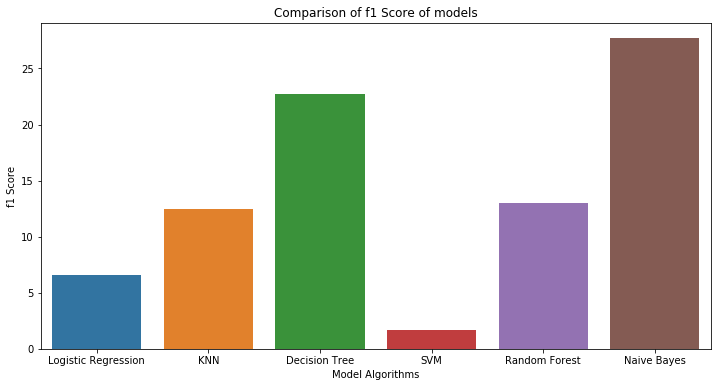

In [72]:
plt.figure(figsize=(12,6))
sns.barplot(x=df2['Model'], y=df2['F1 Score'], data = df)
plt.title('Comparison of f1 Score of models')
plt.xlabel('Model Algorithms')
plt.ylabel('f1 Score')
plt.show()

# Conclusion

<p>1.The most important features in predicting the TEN YEAR CHD were age and systolic blood pressure.</p>
<p>2.By going through the F1 score we found that the Naive Bayes is giving more value than any other model i.e 27.7.</p>
<p>3.It is because Naive Bayes handles both continuous and discrete data as it is highly scalable with the number of predictors and data points.</p>
<p>4.With more data better data is built.</p>
<p>5.And moreover Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality. And even it require a small amount of training data to estimate the necessary parameters.</p>
<br>